## Assignment A9

<ol>
<li>Implement logistic regression using Python/R to perform classification on Social Network_Ads.csv dataset.</li>
<li>Compute Confusion matrix to find TP,FP,TN,FN,Accuracy, Errorrate, Precision, Recall on the given dataset</li>
</ol>

In [58]:
import pandas as pd
import missingno as ms
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

In [59]:

df = pd.read_csv('./Social_Network_Ads.csv')

In [60]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [61]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [62]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<Axes: >

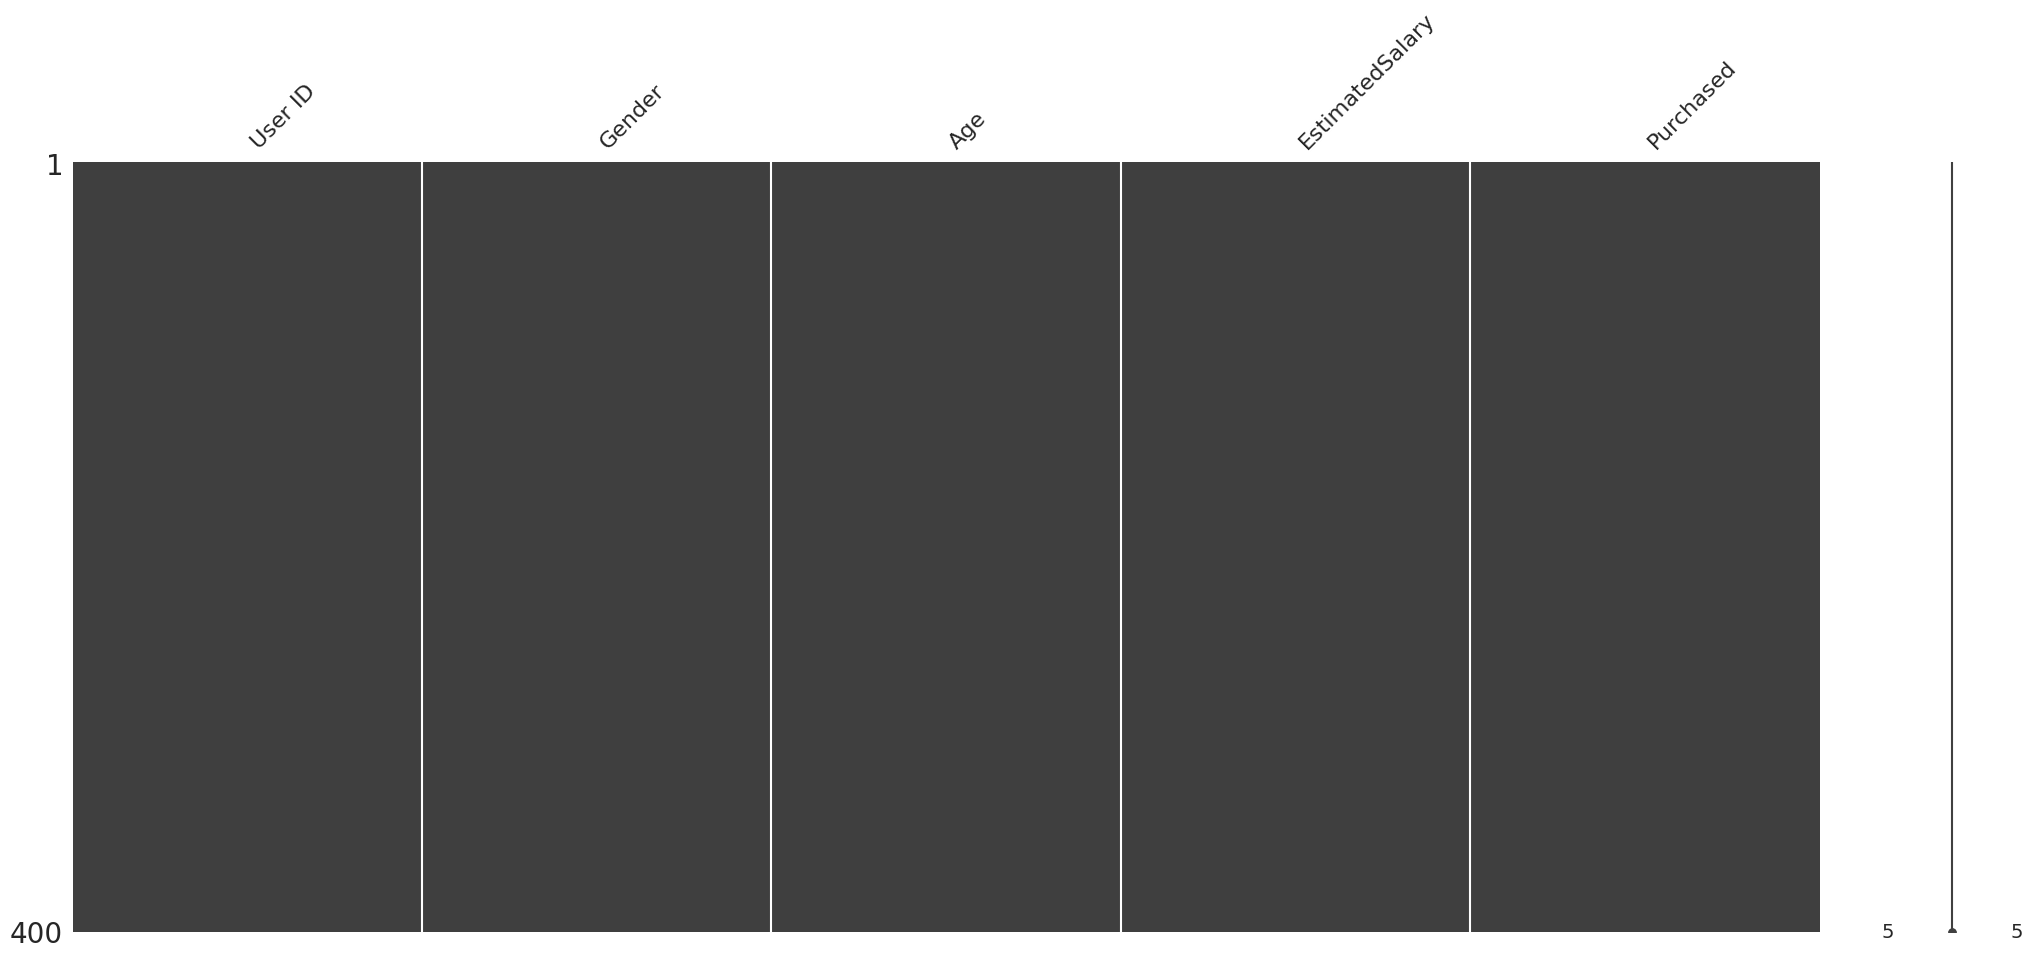

In [63]:

ms.matrix(df)

In [64]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['User ID', 'Purchased'])
y = df['Purchased']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [68]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [70]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 88.75%
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



In [71]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# Print the number of TP, TN, FP, and FN
print("TP:", cm[0, 0])
print("TN:", cm[1, 1])
print("FP:", cm[0, 1])
print("FN:", cm[1, 0])

[[50  2]
 [ 7 21]]
TP: 50
TN: 21
FP: 2
FN: 7


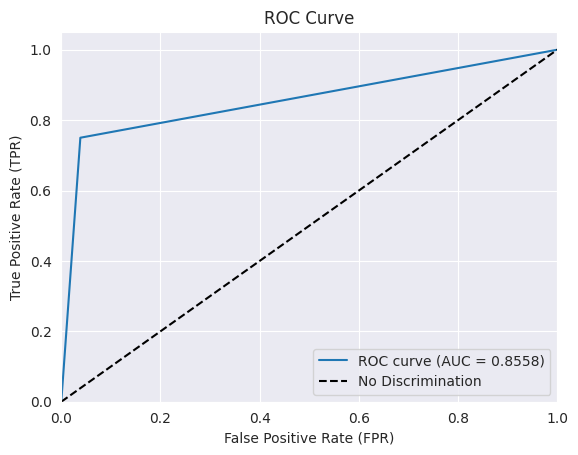

In [73]:
from sklearn.metrics import roc_curve, auc

# Fit your model to the training data (replace 'your_model' with your actual model)
model = LogisticRegression()
model.fit(X_train, y_train)

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--', label='No Discrimination')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
